<a href="https://colab.research.google.com/github/jdansb/Econophysics/blob/main/aproximacao_estatistica_da_lei_do_valor_ABM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistical Approximation of the Law of Value
This model is presented in chapter 9 of the book *Classical Econophysics* and also as the article: [*The Emergence of the Law of Value in a Dynamic Simple Commodity Economy*](https://doi.org/10.1080/09538250701661889).  
First, we must clearly establish that there is a distinction between value and price:

* **Value**: determined by the prevailing technical conditions of production and measured by the socially necessary labor time to produce it.  
* **Price**: the amount of money that the commodity yields in the market.  

In a theoretical simplification of capitalism (a "simple commodity economy"), prices tend to values, and this is what we want to demonstrate.


## The Model

The essential characteristics of the model are:

* It is composed of $N$ workers (identified by an integer $i$ between 1 and $N$).  
* There are $L$ commodities (identified by an integer $j$ between 1 and $L$).  
* It has a total and constant amount of money $M=\sum_{i}^{N}m_{i}$.  
* Each worker produces one commodity at a time.  
* Each commodity is simple: it does not require another commodity to be produced and can be produced by a single worker, and all workers produce the same commodity with the same efficiency.  
* The agents produce to satisfy their needs.



### Production Rule $P_{1}$:

* At the beginning of the simulation, each agent $i$ has a vector $\boldsymbol{e}_{i}=\boldsymbol{0}$ that indicates the quantity of commodities agent $i$ possesses.  
* The commodity $j$ being produced by agent $i$ is given by $A(i)=j$.  We can think of a vector $\boldsymbol{A}$ that tells us what each agent $i$ is producing at the moment.  
* Each commodity requires $l_{j}$ steps to be produced.    That is, at each step the agent produces $L=1/l_{j}$ units of the commodity.  
  We define a vector $\boldsymbol{l}=\left(1/l_{1},\dots,1/l_{L}\right)=\left(L_{1},\dots,L_{L}\right)$.  

Thus, agent $i$ generates one unit of commodity $A(i)$ every $l_{A(i)}$ steps, and as a consequence the element of the vector $e_{i}[A(i)]$ is incremented by one unit.


### Consumption Rule $C_{1}$

* All agents have the same consumption desire given by a global vector  
  $\boldsymbol{c}=\left(1/c_{1},\dots,1/c_{L}\right)=\left(C_{1},\dots,C_{L}\right)$.  
* Each agent $i$ has a consumption deficit vector initialized as $\boldsymbol{d}_{i}=0$.  
* Analogous to production, every $c_{j}$ steps the element $\boldsymbol{d}_{i}[j]$ is incremented by $1$,    that is, at each step the agent’s desire increases by $C_{j}=1/c_{j}$ unit.  

Thus, at each step, agent $i$ consumes a quantity of commodities given by the vector  $\boldsymbol{o}_{i}=\text{min}\left(\boldsymbol{e}_{i},\boldsymbol{d}_{i}\right)$.  For example, for commodity $j=1$:  
* If the agent has none of it, $e_{i}[1]=0$, then they cannot consume.  
* If they have no desire, $d_{i}[1]=0$, they also will not consume.  
* If both values are nonzero and the agent has more than they desire, $e_{i}[1]>d_{i}[1]$,    then they consume only what they desire, $d_{i}[1]$.  
* If the agent has fewer goods than they desire, $e_{i}[1]<d_{i}[1]$,    they consume all they have, $e_{i}[1]$.  

In all cases, consumption is given by the smaller value:  
$o_{i}[1]=\text{min}\left(e_{i}[1],d_{i}[1]\right)$.  Evidently, this consumed amount must be deducted from both the deficit and the commodities in possession.  Thus, the vectors are updated as:  $\boldsymbol{e}'_{i}=\boldsymbol{e}_{i}-\boldsymbol{o}_{i}$ and $\boldsymbol{d}'_{i}=\boldsymbol{d}_{i}-\boldsymbol{o}_{i}$.

---

**Reproduction Coefficient** $\eta=\sum\frac{l_{j}}{c_{j}}=\sum\frac{C_{j}}{L_{j}}$:  
* $\eta=1$ means that production equals consumption: the simulation will adopt this condition.  
* $\eta>1$ means the economy is permanently in deficit.  
* $\eta<1$ means the economy permanently produces a surplus.  

Since under no circumstance do we have $c_{j}<0$ or $l_{j}<0$, to avoid $\eta>1$ we must ensure that no term is $\frac{l_{j}}{c_{j}}>1$.  If there is more than one commodity, then we must be even more restrictive and require $\frac{l_{j}}{c_{j}}<1$.
In other words, it must take fewer steps to produce a commodity than to desire it.  This is a necessary condition for stability, since each agent produces only one commodity at a time but consumes all.  For example, if we have two commodities, two agents, and each produces one commodity with values $l_{j}=1$ and $c_{j}=2$,  then $\eta=0.5+0.5=1$.  


### Price Rule $O_{1}$

* The price of commodity $j$ according to agent $i$ is a value $p_{j}^{i}$  
  that is randomly drawn from the interval $\left[0,m_{i}\right]$.


### Market Rule $M_{1}$:

The market for a given commodity is considered "cleared" when there are no more buyers or sellers for that commodity.  In other words, if it is not cleared, it means there are still buyers and sellers.  We begin with a set $C$ of commodities that have not yet been cleared in the market:

1. Randomly select a commodity $j$ from the set $C$.

2. Randomly select a seller agent $s$ from the set of potential sellers:     that is, agents who have more of commodity $j$ than they wish to consume, $e_{i}[j]>d_{i}[j]$.

3. Randomly select a buyer agent $b$ from the set of potential buyers:     that is, agents who have fewer units of commodity $j$ than they wish to consume, $e_{i}[j]<d_{i}[j]$.

4. If there are no potential buyers or sellers, remove commodity $j$ from $C$.     If there are, apply the exchange rule $\boldsymbol{E}_{1}$.

5. Repeat the previous steps until all commodities are cleared.


### Exchange Rule $E_{1}$

The previous rule identifies buyers and sellers to carry out the conditional exchange defined here.

* Once we have a buyer $b$ and a seller $s$ who estimate the prices $p_{j}^{b}$ and $p_{j}^{s}$ for commodity $j$ by $O_1$ rule,    a transaction price is drawn from the discrete interval $\left[p_{j}^{b},p_{j}^{s}\right]$.  

* If the buyer has enough money, the exchange takes place:  
  the buyer loses money and gains one unit of the commodity, while the seller gains money and loses one unit of the commodity.


### Sector Rule $S_{1}$


After a fixed amount of time, considering we are at period $n$, each agent calculates an error vector  $\left\Vert \boldsymbol{d}_{i}^{n}\right\Vert$ and compares it with the same vector calculated in the previous period $\left\Vert \boldsymbol{d}_{i}^{n-1}\right\Vert$.  If the error has increased, $\left\Vert \boldsymbol{d}_{i}^{n}\right\Vert > \left\Vert \boldsymbol{d}_{i}^{n-1}\right\Vert$,  then the agent randomly switches the commodity being produced.


### Simulation Rule $R_{1}$

The entire cycle of production, consumption, exchange, and reallocation in production follows this rule.  Initially, we construct $\boldsymbol{l}$ and $\boldsymbol{c}$ such that $\eta=1$, and allocate $M/N$ among all agents. Then:

* Increase the simulation time by one step.  
* Invoke rule $P_{1}$ for each agent.  
* Invoke rule $C_{1}$ for each agent.  
* Invoke the market rule $M_{1}$.  
* Invoke rule $S_{1}$ for each agent.  
* Repeat.  

That is:

$$ SCE=\left\{ R_{1},P_{1},C_{1},O_{1}\left\{ M_{1},E_{1}\right\},S_{1}\right\} $$

---

The parameters are:

* $N$ — number of agents.  
* $L$ — number of commodities.  
* $M$ — amount of money in the simulation.  
* $R$ — the maximum possible consumption time, used to constrain the construction of the vectors $\boldsymbol{l}$ and $\boldsymbol{c}$.  

* $C$ — a constant multiple of $R$, and a parameter that defines the duration of the period between applications of the sector-switching rule $S_{1}$.


## Division of Labor

**Definition 1**: A division of labor is efficient when, for each commodity,  the number of commodities being produced equals the demand.   Thus, the total quantity of commodity $j$ demanded per step is $NC_{j}$.  If we have a fraction $\alpha N$ of agents producing commodity $j$,   then $a_{j}NL_{j}$ units are produced per unit of time.  

To achieve an efficient division of labor:


\begin{equation}
a_{j}NL_{j}=NC_{j}\quad\rightarrow \quad a_{j} =\frac{C_{j}}{L_{j}}=\frac{l_{j}}{c_{j}}
\end{equation}

In other words, $a_{j}$ represents an efficient division of labor.



## Objective Prices

We begin with two definitions:  

* The average price of commodity $j$ is given by $\left\langle p_{j}\right\rangle$,    and we have the vector $\boldsymbol{p}=\left(\left\langle p_{1}\right\rangle ,\dots,\left\langle p_{L}\right\rangle \right)$.  
* The values, i.e., the amount of time embedded in the production of the commodities, are $\boldsymbol{v}=\left(l_{1},\dots,l_{L}\right)$.  

Thus, if the price gravitates around value, if it is proportional to value, we can write:

\begin{equation}
\boldsymbol{p} \approx \lambda \boldsymbol{v}
\end{equation}

where $\lambda$ has units of 'money per unit of labor time'. Since our economy is simple, we can then define the Monetary Expression of Labor Time (MELT)  as the ratio between the measure of the total quantity of commodities exchanged over a time interval at current prices  and the productive labor expended in producing these commodities.  

In other words, MELT is simply:



\begin{equation}
\lambda = \frac{\gamma M}{\sum l_{i}v_{i}}
\end{equation}



Analyzing:  

* The denominator is the labor expended on the commodities that are exchanged over a given time interval.    Here, $v_{i}$ is the average exchange rate of commodity $j$.  Thus, we have a summation where each term corresponds to the labor involved in the exchanges of each type of commodity.  

* The numerator is the amount of money exchanged over a given time interval through commodity exchange.    Here, $\gamma$ is simply the proportion of money exchanged per unit of time, so $\gamma M$ is the velocity of money,    i.e., how much money is exchanged within the time interval under consideration.  

In summary, we have:

\begin{equation}
\lambda = \frac{\text{money exchanged per unit of time}}{\text{labor time exchanged per unit of time}} = \frac{\gamma M}{\sum l_{i}v_{i}}
\end{equation}

Evidently, we only focus on commodities that are exchanged, not on production as a whole; we are analyzing the market. It is worth noting that in this model commodities have a price only at the moment of exchange,  while their value is given by the technical production characteristics of the entire society.


## Simulação

Neither the book nor the paper provide the exact implementation code of the model, so I am trying to be as faithful as possible.  However, after several weeks working on this model, some comments need to be made:

**Comment 1**: At no point is it specified whether money is integer or not.  It is only mentioned that the interval from which prices are drawn is discrete,  which is a requirement for any computational model, no matter how small the intervals are.  

The exchange rule can make execution excessively slow if continuous (we will use "continuous" to indicate that we are using variables such as float or double)  money is used,  because the model does not advance until buyers and sellers reach an agreement to clear the market.  However, if a buyer has wealth close to $m_a \approx 0$, the commodity price defined by rule $O_1$  needs to be close to $0$ for the agent to be able to buy.  The lower the probability of this happening, the higher the wealth of the seller.  

In the appendix, the book mentions implementing a limit on the number of times each agent can enter the market,  but it does not detail exactly how this is done.  I opted to use decimal money; tests with integers produced faster but less precise results.  I also limited the agents' visits to the market, regardless of success or failure, or which commodity was involved. In my tests, increasing the number of market visits up to the tested limit made the model more precise but slower.  However, I am not sure whether allowing unlimited attempts necessarily improves the results.  It would require testing to verify whether failing to obtain the desired commodity due to insufficient funds is an important part of the system's dynamics.


**Comment 2**: In the implementation of rule $S_1$ for sector switching, it is not clear how the vector $\boldsymbol{d}_{i}^{(n)}$ is constructed. Is it simply the vector $\boldsymbol{d}_{i}$ at the last step of the period, or is it some distinct vector? I opted for this simpler implementation mentioned.

Also, in this same rule, it is stated that if there was an error increment, the agent should move to a *new sector*, but it says that the new sector is drawn uniformly among the $L$ sectors. It is ambiguous whether the agent can end up remaining in the same sector. I implemented it so that the agent is forced to switch sectors. Some tests also suggest that this dynamic of agents switching between sectors plays an important role in distributing money among agents and sectors within the system, even when the system is in statistical equilibrium.

**Comment 3**: It was not clear to me what happens if, when applying rule $E_1$, the seller's offer $p_j^{(s)}$ is greater than the buyer's offer $p_j^{(b)}$. I assume that we always take both the buyer's and seller's offers and draw the final price between the smaller and the larger of the two, regardless of who is making the offer.  

In the application of rule $O_1$, it is allowed for a commodity to have a price $p=0$. Depending on the total amount of money, it is highly possible that a commodity could be exchanged at no price if we work with integers, which seems undesirable to me.


**Comment 4**: To conclude, I must admit that I had difficulty obtaining the results presented for $L>2$. I initially tried to implement the code in Python, but then migrated to C# in search of higher execution speed. My results show a clear tendency for prices to be proportional to value, but not always with as strong a correlation as presented in both the book and the paper.

I believe that, besides some possible implementation differences, there are certain distributions of production rates and deficits for which the model can exhibit a higher correlation rate, and some parameter choices can make the model more accurate while at the same time increasing computational cost. In my tests, as mentioned, increasing the number of market visits per agent had a positive effect on the final result. Increasing the number of agents itself also helped, as well as using continuous money instead of integer. All these decisions improve the result at the expense of higher computational cost.

Increasing the data capture window—for example, averaging over 50,000 steps instead of 5,000—also had a positive effect, again at the cost of increasing the time required for the simulation to run. This is why I ultimately implemented the code in C#, as can be seen [here](https://github.com/jdansb/Econophysics/blob/main/price_and_value.cs).


However, I must warn that I still believe there may be some subtle differences compared to the original proposal due to the difficulty of faithfully reproducing the results. The correlation originally reported, even for $L=5$, was around 9.8 over 10 runs, and in one case even reached 1. Nonetheless, I believe that this version of the model is already sufficient to investigate the issue. Suggestions for improvement are welcome.  

One of the main problems I notice is that the commodity with the longest production time seems to struggle to achieve the highest price. If we have $L=5$, the other four commodities follow a very strong linear trend, while this last commodity has difficulty showing the expected results. Additionally, this commodity also exhibits an extremely low number of transactions, which I believe is a result of the deficit accumulated in previous steps and the fact that the model prioritizes consumption over exchange. Thus, I assume (though further investigation is needed) that agents who start working in this sector largely end up producing more for consumption than for exchange, even more so than in the other sectors.


Below is a result for $L=5$, with $N=200$ agents, $M=100 \cdot N$, and $L \cdot 500$ market visits per step for each agent, data obtained over 50,000 steps (50,000-100,000):

```
Commodity 0 | Price: 38.33  | Exchanges: 1975  | Workers: 20
Commodity 1 | Price: 116.84 | Exchanges: 154118 | Workers: 30
Commodity 2 | Price: 553.42 | Exchanges: 22738 | Workers: 40
Commodity 3 | Price: 747.60 | Exchanges: 2207 | Workers: 50
Commodity 4 | Price: 541.66 | Exchanges: 148 | Workers: 60
```


The price and worker values are averages. We can note that the distribution of workers in each sector follows the efficient distribution, and that the price increases with value, except for the highest-value commodity. However, it has an exchange volume 13 times lower than the second-lowest traded commodity. One commodity was exchanged roughly every 500 steps.  

It is worth remembering that there is a passage in the book discussing the requirements for the law of value to operate:

> [if] the probability that a seller of j will find a buyer in the marketplace is low; hence exchange becomes occasional, failing a requirement for the law of value to operate.

I believe this is what happens in this model. Despite everything, the relationship remains clear. The correlation considering all commodities is 0.84, and disregarding the highest-value commodity it is 0.97. The production time for each commodity is $[1,1.5,2,2.5,3]$, and the time required to increase a unit of deficit for all commodities is $10$.


Due to the statistical nature of the model, when there are more exchanges, the law of value is respected. For almost the same case, but now allowing only $L \cdot 100$ market visits per agent, and taking the averages between steps 950,000 and 1,000,000, we have:



```
Commodity 0 | Price: 36.69  | Exchanges: 7151   | Workers: 20
Commodity 1 | Price: 101.88 | Exchanges: 139728 | Workers: 30
Commodity 2 | Price: 547.72 | Exchanges: 17750  | Workers: 40
Commodity 3 | Price: 666.68 | Exchanges: 1226   | Workers: 50
Commodity 4 | Price: 891.73 | Exchanges: 142    | Workers: 60
```

A correlation of 0.97.  Another indication that our model is not entirely faithful to the book is that more than half of the commodities have an average price up to 5 times the per capita wealth. In the graph presented in the book (or paper), no wealth exceeds the per capita wealth. However, I believe we are still able to demonstrate the relationship between price and value.

It should also be considered that, although this result is proportional, it is not necessarily directly proportional. That is, we have a kind of base price $b$ for the commodity, to which more price is added according to the labor time required to produce it: $\left\langle p_{j}\right\rangle = \lambda l_{j} + b$. Alternatively, we can think of it as a kind of added value $n_{j} = \frac{b}{\lambda}$ in the commodity, which is not directly defined but emerges from the dynamics of the model. Like an extra time it takes on average to be exchanged after being produced: $\left\langle p_{j}\right\rangle = \lambda \left(l_{j} + n_{j}\right)$.  

We can try to describe the relationship between production and price with a line given by:


The relationship between price and value can be given by the line equation:  = 454.98v + -461.01 with a ratio of -1.01


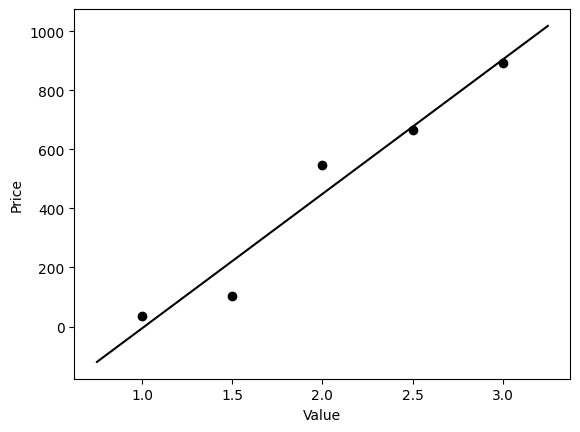

In [26]:
import matplotlib.pyplot as plt
import numpy as np
preco=[36.69,101.88,547.72,666.68,891.73]
valor=[1,1.5,2,2.5,3]
a, b = np.polyfit(valor, preco, 1)
print(f"The relationship between price and value can be given by the line equation:  = {a:.2f}v + {b:.2f} with a ratio of {b/a:.2f}")
plt.plot(valor,preco,'ok')
plt.plot([0.75,3.25],[0.75*a+b,3.25*a+b],'-k')
plt.xlabel('Value')
plt.ylabel('Price')
plt.show()

Although unexpected, this reveals something about the equilibrium of this simulation. If we adjust the values by subtracting $|n_j| \approx 1$, we get $[0,0.5,1,1.5,2]$. In fact, I did not present this data before, but analyzing this simulation it was possible to notice a accumulation of commodity $n=0$, which could be reflected in your *updated* production time being virtually 0.

It is important to note that the value of the commodity used in the MELT calculation should reflect the *real* total average time required from being produced until being available for exchange, so it may not perfectly correspond to the parameters used that cover only the production time of a single unit. Due to the dynamics of the system itself, since a commodity may take longer to become available in the market, or due to some prior accumulation, it can happen that more of the commodity is exchanged in a time interval than is actually produced. We could try to adjust the parameters to reduce $n_j$, but let's simplify and work with 2 commodities and a Python code.





**Extra**:

A possible algorithm for constructing the vectors $l$ and $c$ is as follows:   First, generate two random vectors $\boldsymbol{l} = \left(L_{1}, \dots, L_{L}\right)$ and $\boldsymbol{u} = \left(u_{1}, \dots, u_{L}\right)$. Compute the sum $\sum_{i}^{L} \frac{u_{j}}{L_{j}} = F$, then divide both sides by $F$:


\begin{equation}
\sum_{i}^{L}\frac{1}{F}\frac{u_{j}}{L_{j}}=\frac{F}{F}\rightarrow\sum_{i}^{L}\frac{u_{j}/F}{L_{j}}=1=\sum_{i}^{L}\frac{C_{j}}{L_{j}}
\end{equation}

That is, the elements of the vector $\boldsymbol{C}$ are $C_{j} = \frac{u_{j}}{F}$, or equivalently, $\boldsymbol{C} = \frac{\boldsymbol{u}}{F}$.